From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치


## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
seed = 2022
np.random.seed(seed)

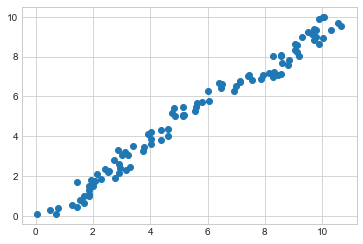

In [4]:
# Make sample data
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))
plt.scatter(X,y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
model = None
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))

선형 회귀 가중치: [0.95642171]
선형 회귀 편향: -0.2202999173605633


In [8]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9798754338423539
평가 데이터 점수: 0.9728086722556394


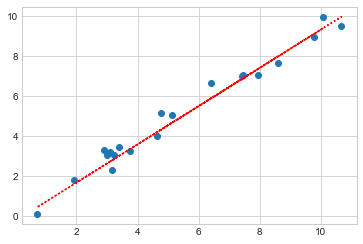

In [9]:
predict = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, predict, ':r')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [40]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [41]:
# shuffle
boston_df = boston_df.sample(frac=1).reset_index(drop=True)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,11.57790,0.0,18.10,0.0,0.700,5.036,97.0,1.7700,24.0,666.0,20.2,396.90,25.68,9.7
1,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36,23.1
2,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5.0,279.0,19.2,396.90,9.68,18.9
3,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4.0,245.0,19.2,396.90,3.33,28.5
4,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5


In [42]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


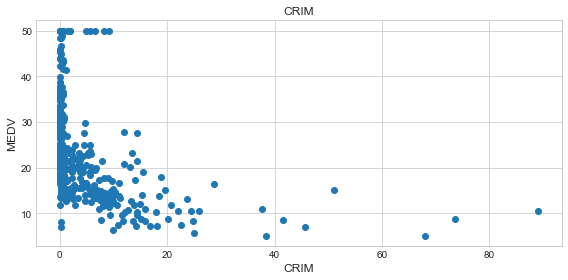

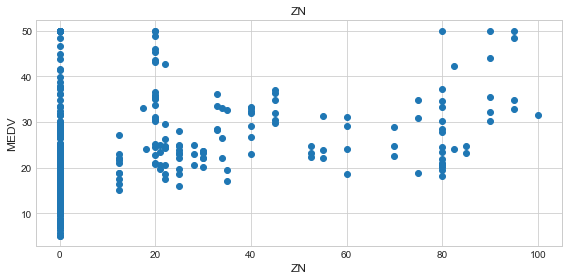

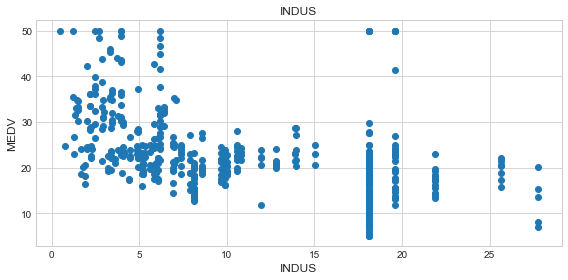

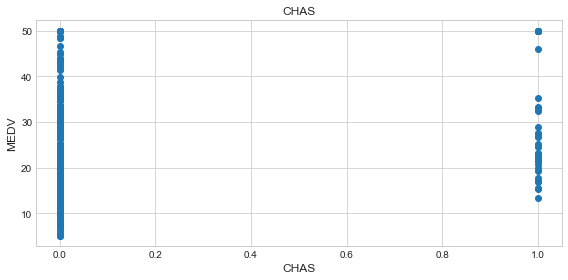

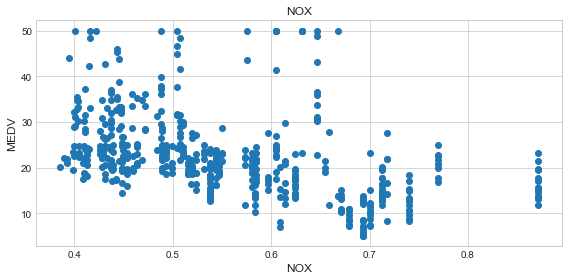

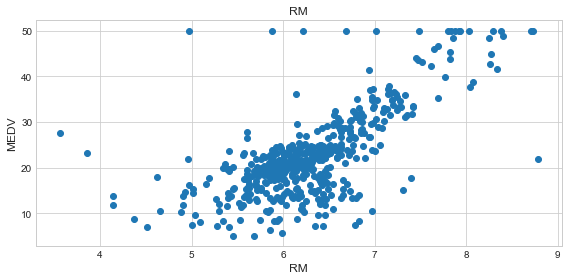

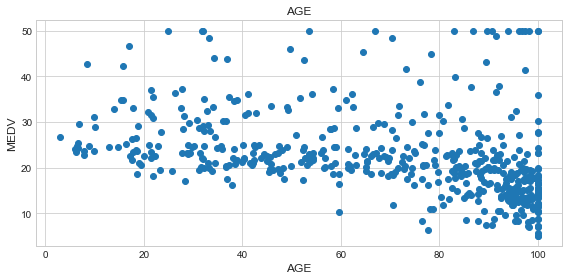

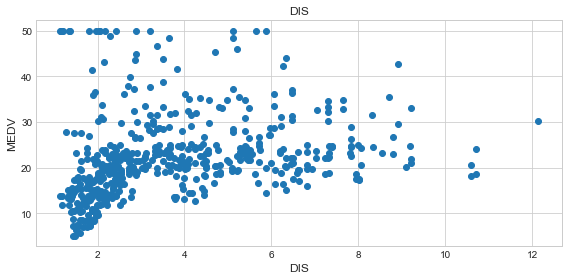

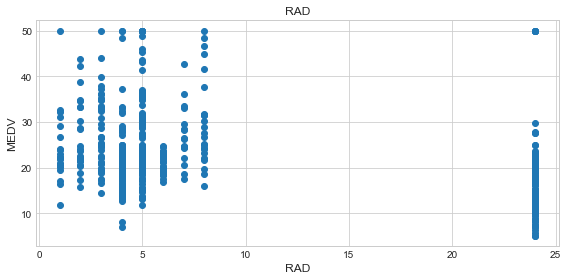

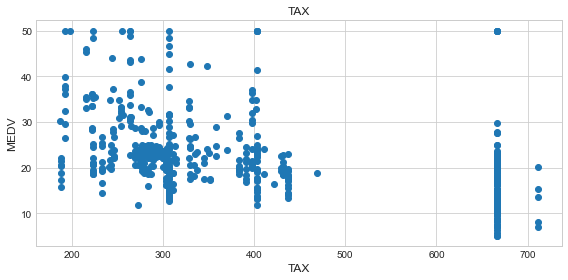

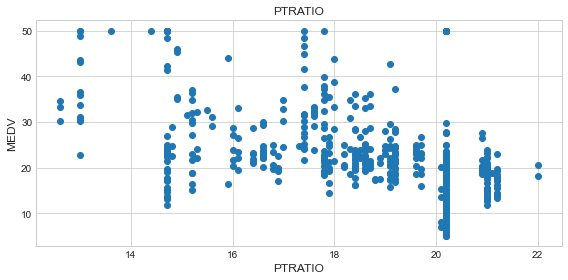

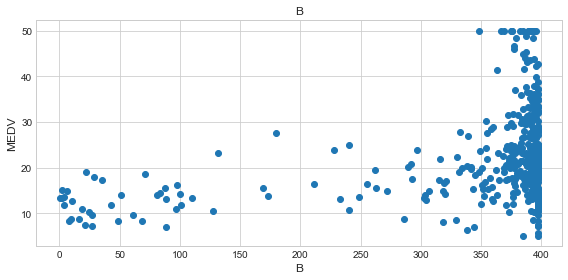

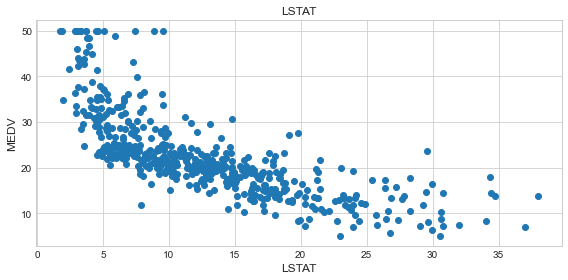

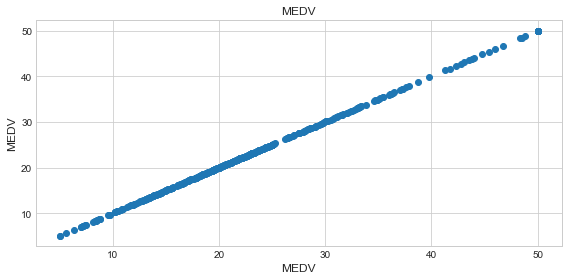

In [43]:
for i, col in enumerate(boston_df.columns):
    plt.figure(figsize=(8,4))
    plt.scatter(boston_df[col], boston_df['MEDV'])
    plt.title(col)
    plt.xlabel(col, size=12)
    plt.ylabel('MEDV', size=12)
    plt.tight_layout()

In [14]:
import seaborn as sns

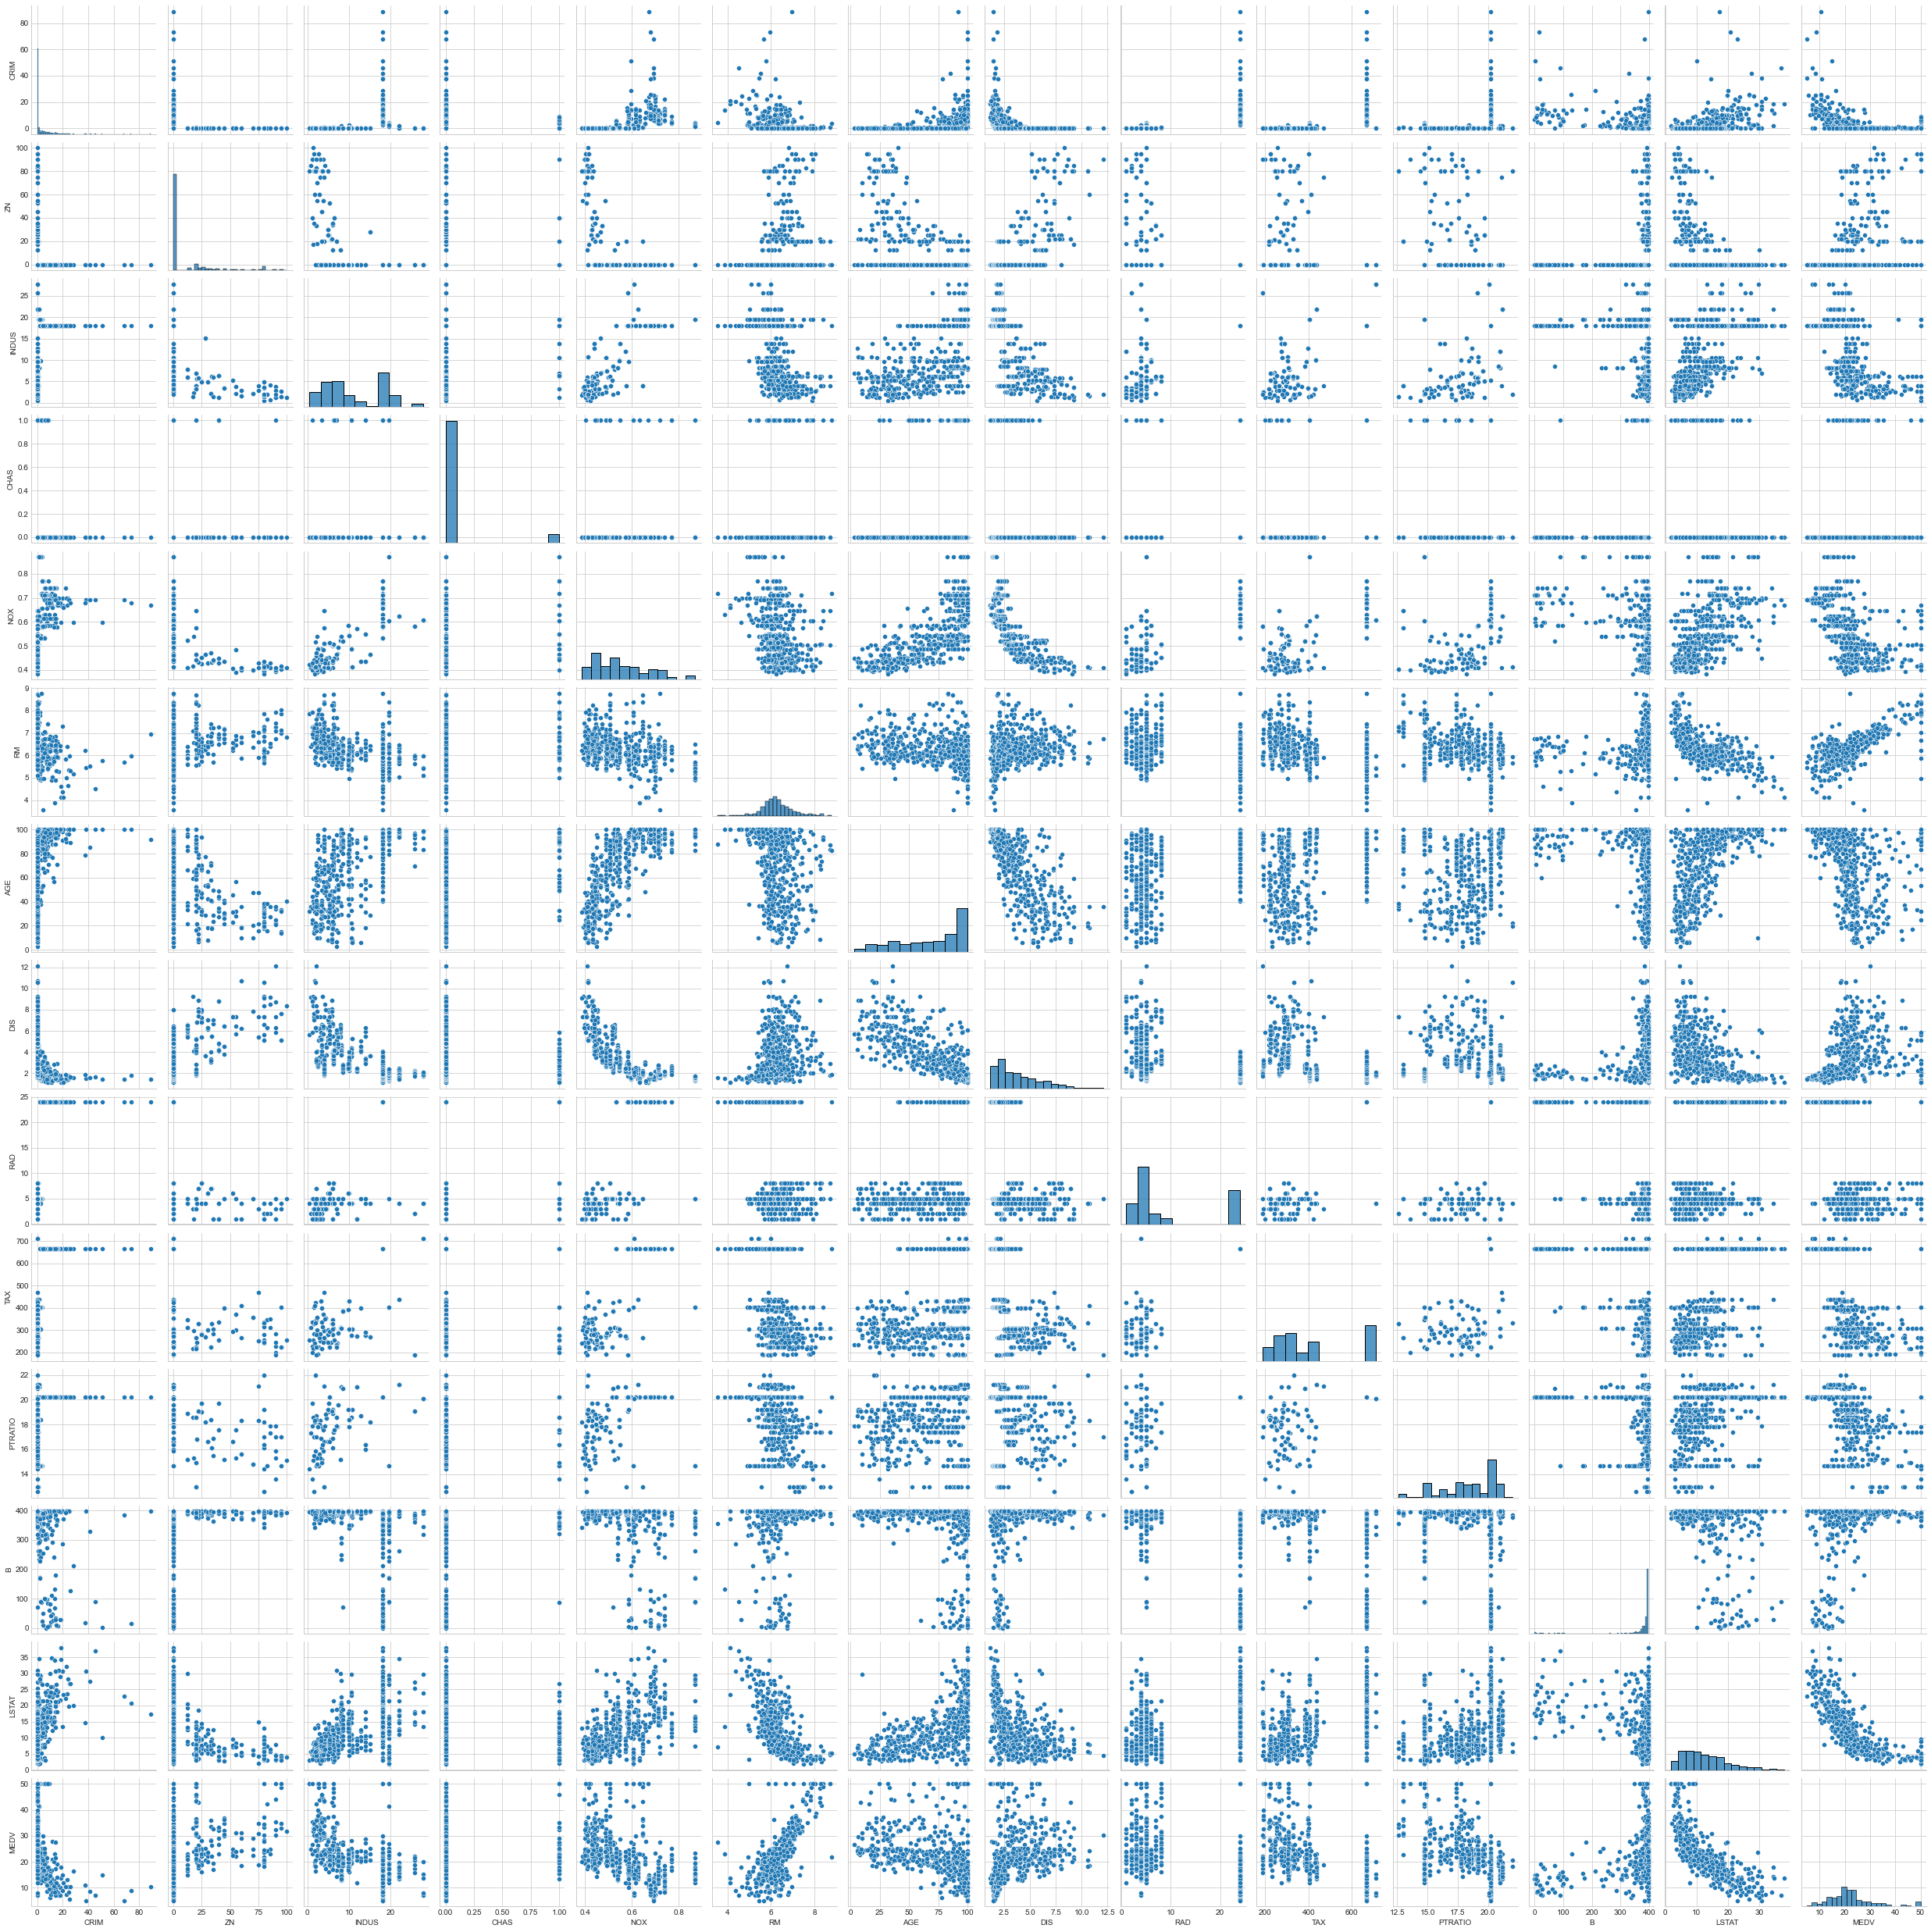

In [15]:
sns.pairplot(boston_df)

### 보스턴 주택 가격에 대한 선형 회귀

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression(normalize=True)

In [45]:
# X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:, :-1], boston_df.iloc[:, -1], test_size=0.2)

In [46]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6605365478451792

In [47]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7510737736143757
평가 데이터 점수: 0.6605365478451792


* 데이터를 두개로 분리하고 모델을 생성 및 검증하였지만, 데이터를 분리하였기 때문에 훈련에 사용할 수 있는 양도 작아지고, 분리가 잘 안된 경우에는 잘못된 검증이 될 수 있음
* 이럴 경우에는 테스트셋을 여러개로 구성하여 교차 검증을 진행
* `cross_val_score()` 함수는 교차 검증을 수행하여 모델을 검증
* 다음 예제에서는 모델 오류를 측정하는 점수로 NMSE(Negative Mean Squared Error)를 사용

In [50]:
from sklearn.model_selection import cross_val_score, cross_validate

# scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='neg_mean_squared_error')
scores = cross_val_score(model, boston_df.iloc[:, :-1], boston_df.iloc[:,-1], cv=10, scoring='neg_mean_squared_error')
print("NMSE scores: {}".format(scores))
print('NMSE scores mean: {}'.format(scores.mean()))
print('NMSE scores std: {}'.format(scores.std()))

NMSE scores: [-24.42345251 -33.08167797 -11.0027299  -17.04569257 -20.61716405
 -39.31374204 -42.25198407 -19.96326072 -16.52257492 -14.43984934]
NMSE scores mean: -23.866212808646075
NMSE scores std: 10.21010012627578


* 회귀모델의 검증을 위한 또 다른 측정 지표 중 하나로 결정 계수(coefficient of determination, $R^2$) 사용

In [55]:
# r2_scores = cross_val_score(model, boston.data, boston.target, cv=10, scoring='r2')
r2_scores = cross_val_score(model, boston_df.iloc[:, :-1], boston_df.iloc[:,-1], cv=10, scoring='r2')

print("R2 scores: {}".format(r2_scores))
print('R2 scores mean: {}'.format(r2_scores.mean()))
print('R2 scores std: {}'.format(r2_scores.std()))

R2 scores: [0.72521883 0.66000535 0.83119292 0.70987363 0.78707043 0.66680872
 0.45908484 0.70454136 0.77199862 0.8252103 ]
R2 scores mean: 0.7141005026461327
R2 scores std: 0.10254826620610795


생성된 회귀 모델에 대해서 평가를 위해 LinearRegression 객체에 포함된 두 개의 속성 값을 통해 수식을 표현
* intercept_: 추정된 상수항
* coef_: 추정된 가중치 벡터

In [58]:
print('y= ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
    print(str(c) + ' * X' + str(i))

y= 39.125472169038204 
-0.0949656850078674 * X0
0.04659406151196186 * X1
-0.002650861710349469 * X2
2.705915293920948 * X3
-18.440675300910037 * X4
3.4698209879175015 * X5
0.01738987934904009 * X6
-1.4933297908866485 * X7
0.314863392333049 * X8
-0.01186373907996761 * X9
-1.008636799879135 * X10
0.011238944216078878 * X11
-0.5891639263266323 * X12


In [56]:
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
y_train_predict = model.predict(X_train)
mse = mean_squared_error(y_train, y_train_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 4.754440048166721
R2 score: 0.7510737736143757


In [59]:
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 4.479586311234898
R2 score: 0.6605365478451792


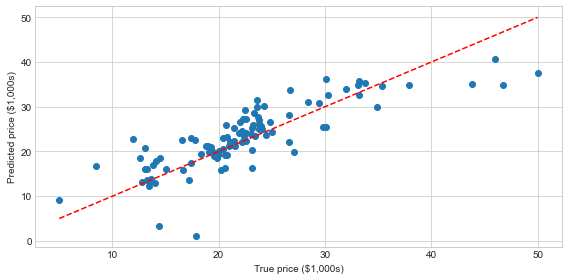

In [65]:
def plot_boston_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([5,50], [5,50], '--r')
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()
    
predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(expected, predicted)

<AxesSubplot:xlabel='NOX', ylabel='MEDV'>

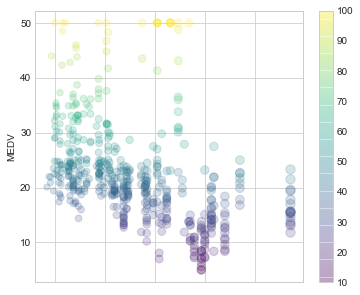

In [150]:
boston_df.plot(kind='scatter', x= 'NOX', y= 'MEDV',figsize=(6,5), alpha=0.2, s=boston_df['NOX']*100,
              c=boston_df['MEDV']*2, cmap=plt.get_cmap('viridis'), colorbar=True)

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 자치시(town)별 비소매 상업지역 토지 비율 |
| AveBedrms | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| Population | 10,000,000당  일산화질소 농도 |
| AveOccup | 주택 1가구당 평균 방의 수 |
| Latitude | 1940년 이전에 건축된 소유주택 비율 |
| Longitude | 5개의 보스턴 고용 센터까지의 가중 거리 |

In [79]:
from sklearn.datasets import fetch_california_housing

In [83]:
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [96]:
california.target_names

['MedHouseVal']

In [92]:
california_df = pd.DataFrame(data=california.data, columns=california.feature_names)
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [97]:
california_df[california.target_names[0]] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


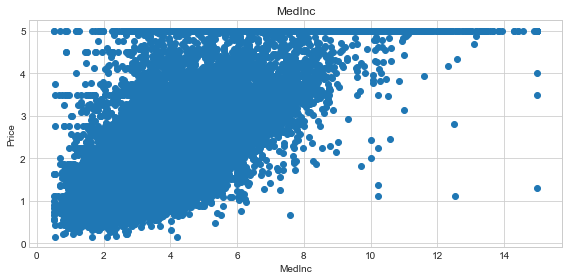

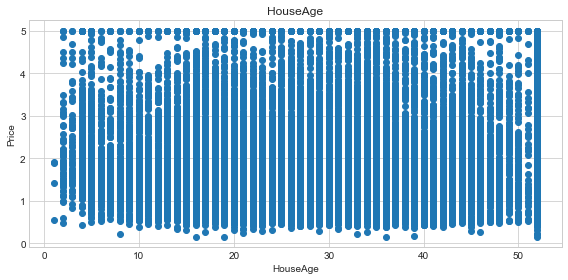

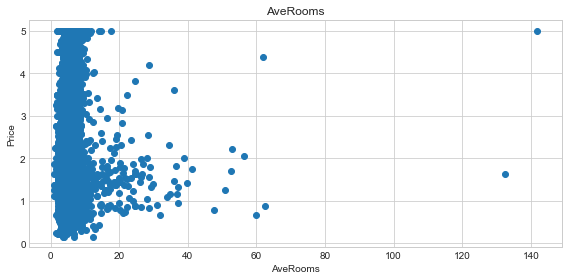

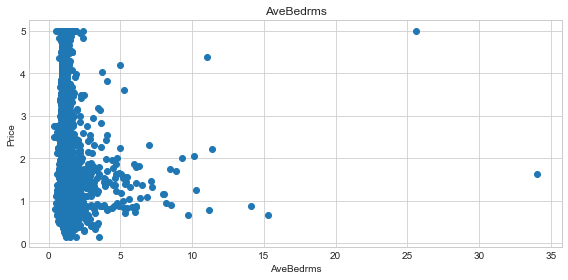

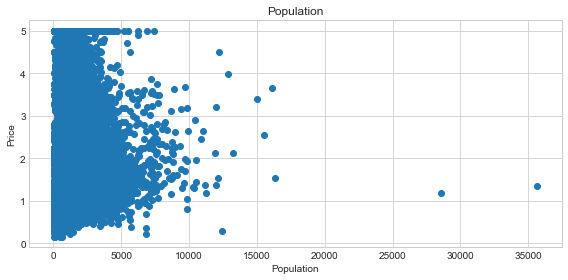

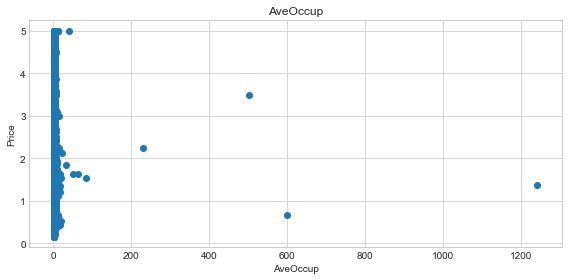

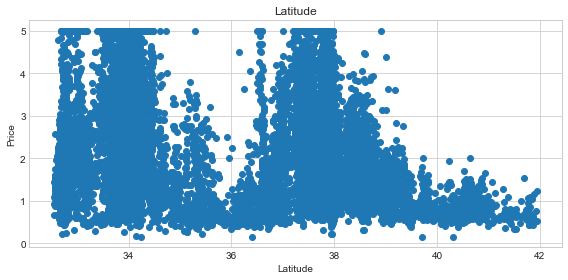

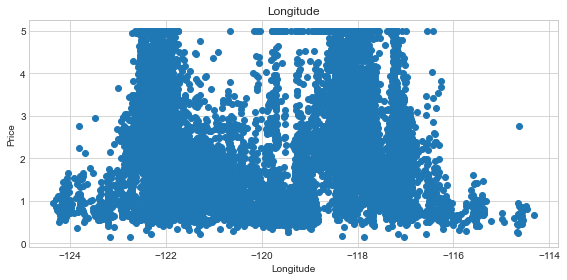

In [104]:
for i, col in enumerate(california_df.columns[:-1]):
    plt.figure(figsize=(8,4))
    plt.scatter( california_df[col], california_df.iloc[:, -1])
    plt.title(col)
    plt.ylabel('Price')
    plt.xlabel(col)
    plt.tight_layout()

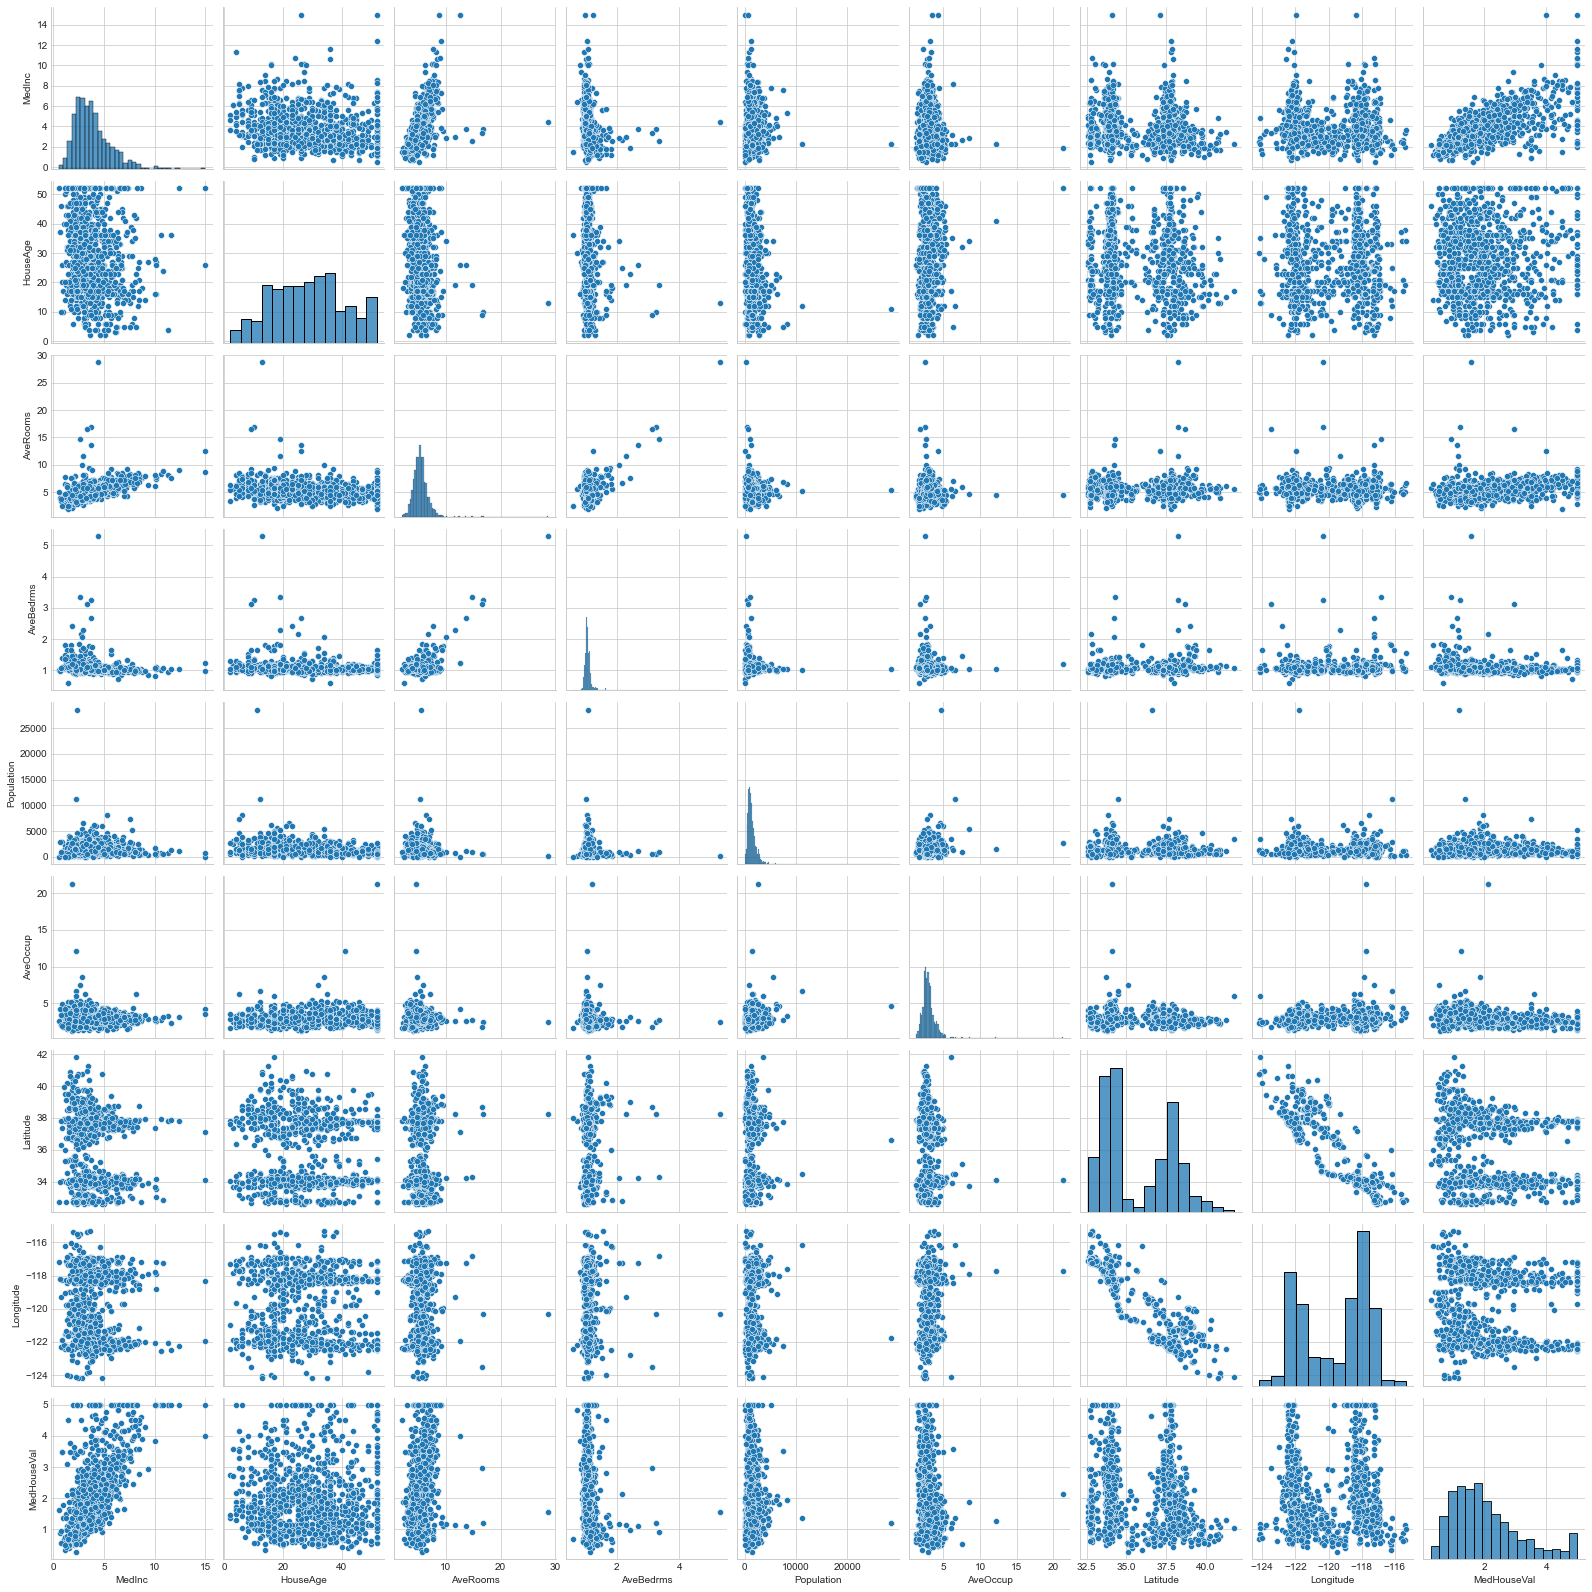

In [106]:
sns.pairplot(california_df.sample(1000)) # 1000개만 뽑아서.

In [105]:
california_df = california_df.sample(frac=1).reset_index(drop=True)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

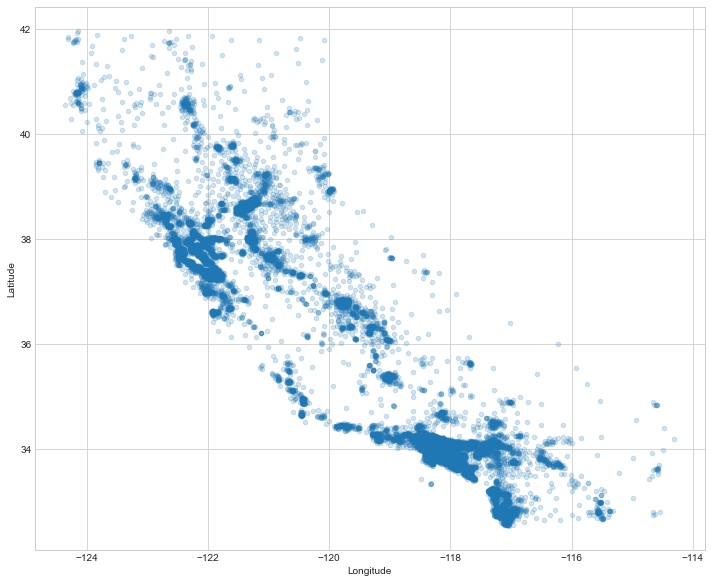

In [108]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12,10))

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

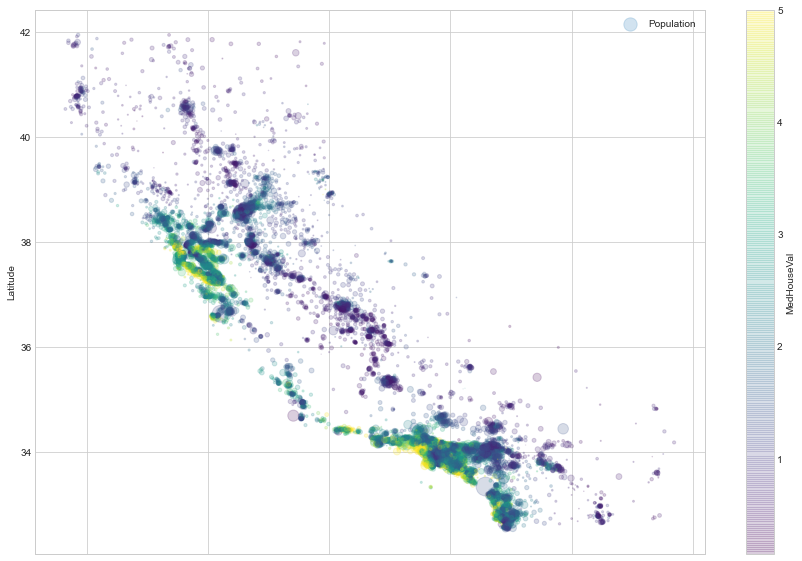

In [110]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, 
                   s=california_df['Population']/100, label= 'Population', figsize=(15,10),
                   c='MedHouseVal', cmap=plt.get_cmap('viridis'), colorbar=True)

### 캘리포니아 주택 가격에 대한 선형 회귀

In [114]:
model = None
model = LinearRegression(normalize=True)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:, :-1], california_df.iloc[:, -1], test_size=0.2)

In [116]:
model.fit(X_train, y_train)
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.6047374382138919
평가 데이터 점수 0.6119517328540205


In [129]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print('NMSE scores: {}'.format(scores))
print('NMSE mean: {}'.format(np.mean(scores)))
print('NMSE std: {}'.format(np.std(scores)))

NMSE scores: [0.61248269 0.59943645 0.61572178 0.55489481 0.62401634 0.58688103
 0.60001061 0.58512222 0.605049   0.61006309]
NMSE mean: -0.5329984150025193
NMSE std: 0.025946697592340646


In [130]:
r2_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
print('r2 scores: {}'.format(r2_scores))
print('r2 mean: {}'.format(np.mean(r2_scores)))
print('r2 std: {}'.format(np.std(r2_scores)))

r2 scores: [0.61248269 0.59943645 0.61572178 0.55489481 0.62401634 0.58688103
 0.60001061 0.58512222 0.605049   0.61006309]
r2 mean: 0.5993678005039381
r2 std: 0.01879039602564635


In [120]:
for i, col in enumerate(california_df.columns[:-1]):
    print(" Y = ", model.coef_[i],"*",col," + ", model.intercept_)

 Y =  0.4348789953547691 * MedInc  +  -36.36163255288379
 Y =  0.00983355813590741 * HouseAge  +  -36.36163255288379
 Y =  -0.10647337052472526 * AveRooms  +  -36.36163255288379
 Y =  0.63803754871448 * AveBedrms  +  -36.36163255288379
 Y =  -3.7909577878175245e-06 * Population  +  -36.36163255288379
 Y =  -0.003474450515265546 * AveOccup  +  -36.36163255288379
 Y =  -0.41491204061125203 * Latitude  +  -36.36163255288379
 Y =  -0.42772894998852495 * Longitude  +  -36.36163255288379


In [124]:
y_train_predict = model.predict(X_train)

In [133]:
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 score: {}'.format(r2))

RMSE: 0.7255240943596103
R2 score: 0.6047374382138919


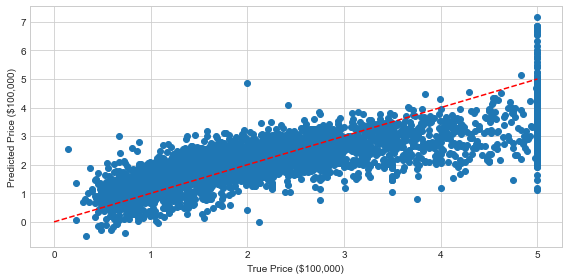

In [136]:
def plot_california_prices(expected, predicted):
    plt.figure(figsize=(8,4))
    plt.scatter(expected, predicted)
    plt.plot([0,5], [0,5], '--r')
    plt.xlabel('True Price ($100,000)')
    plt.ylabel('Predicted Price ($100,000)')
    plt.tight_layout()
    
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 릿지 회귀(Ridge Regression)

* 릿지 회귀는 선형 회귀를 개선한 선형 모델
* 릿지 회귀는 선형 회귀와 비슷하지만, 가중치의 절대값을 최대한 작게 만든다는 것이 다름
* 이러한 방법은 각각의 특성(feature)이 출력 값에 주는 영향을 최소한으로 만들도록 규제(regularization)를 거는 것
* 규제를 사용하면 다중공선성(multicollinearity) 문제를 방지하기 때문에 모델의 과대적합을 막을 수 있게 됨
* 다중공선성 문제는 두 특성이 일치에 가까울 정도로 관련성(상관관계)이 높을 경우 발생
* 릿지 회귀는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
RidgeMSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 사용자가 지정하는 매개변수
  * $\alpha$가 크면 규제의 효과가 커지고, $\alpha$가 작으면 규제의 효과가 작아짐

### 보스턴 주택 가격에 대한 릿지 회귀

In [179]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [180]:
# X, y = load_bostin(return_X_y=true) # .data, .target을 알아서 return 시?켜줌?

In [165]:
boston = load_boston()
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                         columns= np.append(boston['feature_names'],['target']))

In [174]:
boston_df = boston_df.sample(frac=1).reset_index(drop=True)
# boston_df2 = boston_df.iloc[np.random.permutation(boston_df.index)].reset_index(drop=True)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=seed)
# test_size default value = 0.25

In [187]:
model = None
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [188]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.7427768340308664
평가 데이터 점수 0.7133073966699133


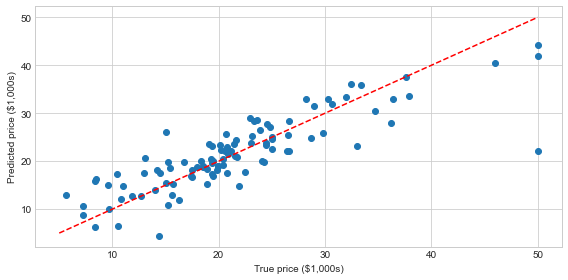

In [189]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

* 릿지 회귀는 가중치에 제약을 두기 때문에 선형 회귀 모델보다 훈련 데이터 점수가 낮을 수 있음
* 일반화 성능은 릿지 회귀가 더 높기 때문에 평가 데이터 점수는 릿지 회귀가 더 좋음

* 일반화 성능에 영향을 주는 매개 변수인 $\alpha$ 값을 조정해 보면서 릿지 회귀 분석의 성능이 어떻게 변하는지 확인 필요

### 캘리포니아 주택 가격에 대한 릿지 회귀

In [190]:
from sklearn.linear_model import Ridge
from sklearn.datasets import fetch_california_housing

In [198]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df[california.target_names[0]] = california.target # target_names is list. assign element number

In [199]:
california_df = california_df.sample(frac=1).reset_index(drop=True)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:,:-1], california_df.iloc[:,-1],
                                                   test_size=0.2, random_state=seed,)

In [206]:
model = None
model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

Ridge(alpha=0.2)

In [207]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.6071181303941784
평가 데이터 점수 0.6024845937076353


## 라쏘 회귀(Lasso Regression)

* 선형 회귀에 규제를 적용한 또 다른 모델로 라쏘 회귀가 있음
* 라쏘 회귀는 릿지 회귀와 비슷하게 가중치를 0에 가깝게 만들지만, 조금 다른 방식을 사용

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
LassoMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \alpha \sum_{i=1}^{p} |w_i|
\end{equation}

* 라쏘 회귀도 매개변수인 $\alpha$ 값을 통해 규제의 강도 조절 가능

### 보스턴 주택 가격에 대한 라쏘 회귀

In [210]:
from sklearn.linear_model import Lasso

In [208]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=seed)

In [213]:
model = None
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [214]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.7425660387202839
평가 데이터 점수 0.7136480381430517


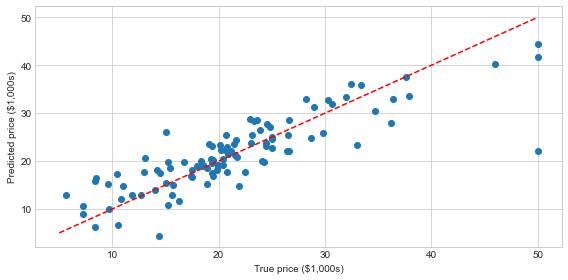

In [215]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 라쏘 회귀

In [216]:
from sklearn.linear_model import Lasso

In [217]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:,:-1], california_df.iloc[:,-1],
                                                   test_size=0.2, random_state=seed,)

In [219]:
model = None
model = Lasso(alpha=0.01)
model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [220]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.6034128537720453
평가 데이터 점수 0.5965266197751354


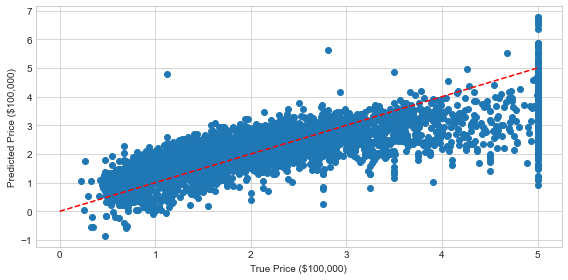

In [221]:
predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)

## 신축망 (Elastic-Net)

* 신축망은 릿지 회귀와 라쏘 회귀, 두 모델의 모든 규제를 사용하는 선형 모델
* 두 모델의 장점을 모두 갖고 있기 때문에 좋은 성능을 보임
* 데이터 특성이 많거나 서로 상관 관계가 높은 특성이 존재 할 때 위의 두 모델보다 좋은 성능을 보여 줌

* 신축망은 다음과 같은 함수를 최소화 하는 파라미터 $w$를 찾음

\begin{equation}
ElasticMSE = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i) + \alpha \rho \sum_{i=1}^{p} |w_i| + \alpha (1 - \rho) \sum_{i=1}^{p} w_i^2
\end{equation}

  + $\alpha$: 규제의 강도를 조절하는 매개변수
  + $\rho$: 라쏘 규제와 릿지 규제 사이의 가중치를 조절하는 매개변수

### 보스턴 주택 가격에 대한 신축망

In [228]:
from sklearn.linear_model import ElasticNet

In [229]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=seed)

In [232]:
model = None
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [233]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.7380164339579547
평가 데이터 점수 0.7100441312221888


### 캘리포니아 주택 가격에 대한 신축망

In [234]:
from sklearn.linear_model import ElasticNet

In [240]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:,:-1], california_df.iloc[:,-1],
                                                   test_size=0.2, random_state=seed)

In [241]:
model = None
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [242]:
print('학습 데이터 점수 {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 0.6054591891044883
평가 데이터 점수 0.5992038880317314


## 직교 정합 추구 (Orthogonal Matching Pursuit)

* 직교 정합 추구 방법은 모델에 존재하는 가중치 벡터에 특별한 제약을 거는 방법

* 직교 정합 추구 방법은 다음을 만족하는 파라미터 $w$를 찾는것이 목표

\begin{equation}
\underset{w}{\arg \min} \; ||y - \hat{y}||^2_2 \; subject \; to \; ||w||_0 \leq k
\end{equation}

  + $||w||_0$: 가중치 벡터 $w$에서 0이 아닌 값의 개수

* 직교 정합 추구 방법은 가중치 벡터 $w$에서 0이 아닌 값이 $k$개 이하가 되도록 훈련됨
* 이러한 방법은 모델이 필요 없는 데이터 특성을 훈련 과정에서 자동으로 제거 하도록 만들 수 있음

### 보스턴 주택 가격에 대한 직교 정합 추구

In [245]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [244]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=seed)

In [260]:
model = None
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7) # feature수를 7개로 이하로 훈련
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=7)

In [261]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7224253099462272
평가 데이터 점수: 0.7096558755224806


* 직교 정합 추구 방법은 위에서 설명한 제약 조건 대신에 다음 조건을 만족하도록 변경 가능

\begin{equation}
\underset{w}{\arg \min} \; ||w||_0 \; subject \; to \; ||y - \hat{y}||^2_2 \leq tol
\end{equation}

  + $||y - \hat{y}||^2_2$는 $\sum_{i=1}^N (y - \hat{y})^2$와 같은 의미

* 위의 식을 통해서 직교 정합 추구 방법을 $y$와 $\hat{y}$ 사이의 오차 제곱 합을 $tol$ 이하로 하면서 $||w||_0$를 최소로 하는 모델로 대체 가능

In [270]:
model = None
model = OrthogonalMatchingPursuit(tol=0.1)
model.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)


OrthogonalMatchingPursuit(tol=0.1)

In [271]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.7429957921293135
평가 데이터 점수: 0.7133864260357592


### 캘리포니아 주택 가격에 대한 직교 정합 추구

In [272]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [273]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:,:-1], california_df.iloc[:,-1],
                                                   test_size=0.2, random_state=seed)

In [274]:
model = None
model = OrthogonalMatchingPursuit(n_nonzero_coefs=5)
model.fit(X_train, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=5)

In [275]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6002451178681876
평가 데이터 점수: 0.5932076261624446


In [276]:
model = None
model = OrthogonalMatchingPursuit(tol=0.1)
model.fit(X_train, y_train)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return f(*args, **kwargs)


OrthogonalMatchingPursuit(tol=0.1)

In [277]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6071181318622259
평가 데이터 점수: 0.6024863824171136


## 다항 회귀 (Polynomial Regression)

* <span style='color:red'>입력 데이터를 비선형 변환 후</span> 사용하는 방법
* 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

* 차수가 높아질수록 더 복잡한 데이터 학습 가능
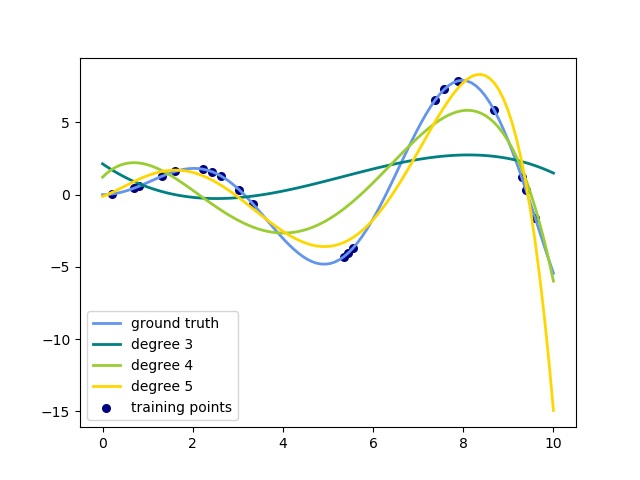

### 보스턴 주택 가격에 대한 다항 회귀

In [278]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [279]:
boston = load_boston()
boston_df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                         columns= np.append(boston['feature_names'],['target']))

In [280]:
boston_df = boston_df.sample(frac=1).reset_index(drop=True)

In [281]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.iloc[:,:-1], boston_df.iloc[:,-1], 
                                                    test_size=0.2, random_state=seed)

In [288]:
model = None
model = make_pipeline(PolynomialFeatures(degree=2), 
                      StandardScaler(),
                      LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [289]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9275205196104015
평가 데이터 점수: 0.877063823310232


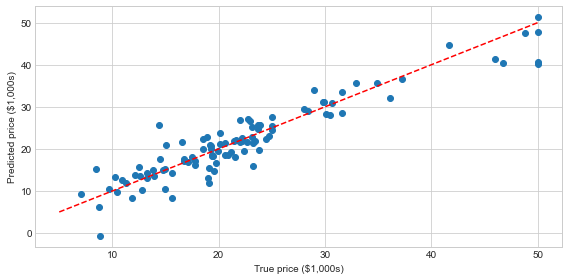

In [290]:
predicted = model.predict(X_test)
expected = y_test
plot_boston_prices(expected, predicted)

### 캘리포니아 주택 가격에 대한 다항 회귀

In [295]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [296]:
X_train, X_test, y_train, y_test = train_test_split(california_df.iloc[:,:-1], california_df.iloc[:,-1],
                                                   test_size=0.2, random_state=seed)

In [297]:
model = None
model = make_pipeline(PolynomialFeatures(degree=2),
                     StandardScaler(),
                     LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [298]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.6862282571176627
평가 데이터 점수: 0.6654115120985087


## 참고문헌

* scikit-learn 사이트: https://scikit-learn.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Sebastian Raschka, Vahid Mirjalili, "Python Machine Learning", Packt
* Giuseppe Bonaccorso, "Machine Learning Algorithm", Packt
* Aurelien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems", O'Reilly